# Big Data Mart Sales project 

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
#from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("bigdatamart_Train.csv")
# pd.set_option('display.max_rows',None)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

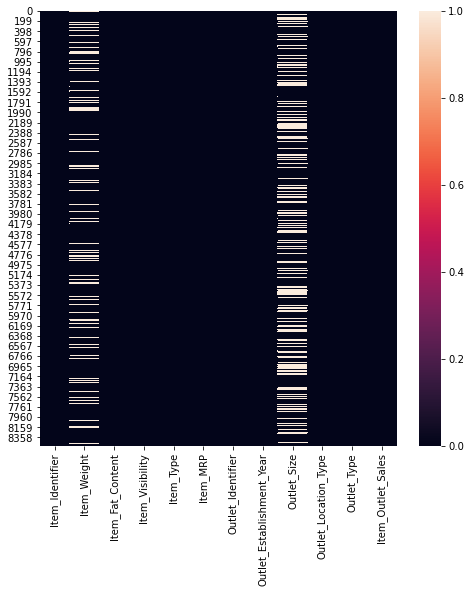

In [7]:
plt.figure(figsize=[8,8])
sns.heatmap(df.isnull())

# Null Value Fixing:

In [8]:
pd.set_option('display.max_rows',None)
df["Item_Weight"].value_counts()


12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
9.300     68
16.700    66
10.500    66
19.350    63
20.700    62
16.000    62
9.800     61
17.700    60
17.750    60
15.000    59
18.850    59
15.850    59
16.750    58
18.250    58
19.600    58
15.700    57
12.500    56
9.195     56
20.200    53
12.100    53
10.195    53
12.600    53
15.600    52
13.500    51
11.500    51
12.350    50
11.600    50
19.700    50
20.250    50
9.600     49
12.850    49
13.150    49
12.300    49
9.500     49
17.850    48
14.000    47
15.500    47
20.350    47
16.350    46
16.500    46
15.200    46
17.250    45
20.500    44
19.000    44
9.000     44
10.100    44
14.500    44
10.000    43
16.200    43
18.200    43
10.300    43
13.350    42
11.100    42
17.500    41
19.100    41
14.150    41
16.100    41
15.350    40
13.000    40
11.650    39
20.750    39
19.850    39
13.100    39
19.200    39
20.600    38
18.700    38
18.000    38
18.350    37
17.350    37
18.600    37
12.650    36
10.895    36

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

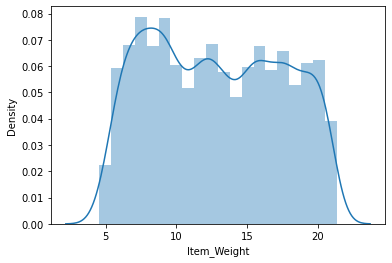

In [9]:
sns.distplot(df['Item_Weight'])

In [10]:
df["Item_Weight"].mean()

12.857645184136183

In [11]:
df["Item_Weight"].median()

12.6

In [12]:
df['Item_Weight'] = df['Item_Weight'].fillna((df['Item_Weight'].mean()))

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Observation:
Since it is catogorical column lets handle the Null values with mode.

In [15]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [16]:
df.Outlet_Size=df.Outlet_Size.fillna(df['Outlet_Size'].mode()[0])

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df["Item_Outlet_Sales"].value_counts()

958.7520      17
1342.2528     16
1845.5976     15
703.0848      15
1278.3360     14
1230.3984     14
1416.8224     13
1438.1280     12
759.0120      12
575.2512      12
1211.7560     12
539.2980      12
852.2240      11
1537.9980     11
1701.7848     11
639.1680      11
679.1160      11
2109.2544     11
2277.0360     11
1406.1696     11
1304.9680     11
2696.4900     10
1470.0864     10
1006.6896     10
2117.2440     10
2956.1520     10
1821.6288     10
2348.9424     10
918.8040      10
1677.8160     10
452.7440      10
2759.0752     10
1518.0240     10
1571.2880     10
527.3136      10
3020.0688     10
3415.5540     10
223.7088      10
1737.7380      9
1713.7692      9
1869.5664      9
1693.7952      9
671.1264       9
1225.0720      9
2157.1920      9
1298.3100      9
447.4176       9
755.0172       9
3691.1952      9
790.9704       9
2684.5056      9
1565.9616      9
2302.3364      9
2450.1440      9
2013.3792      9
1757.7120      9
3435.5280      9
343.5528       8
2059.9852     

## Now Lets check for outliers with box plot:

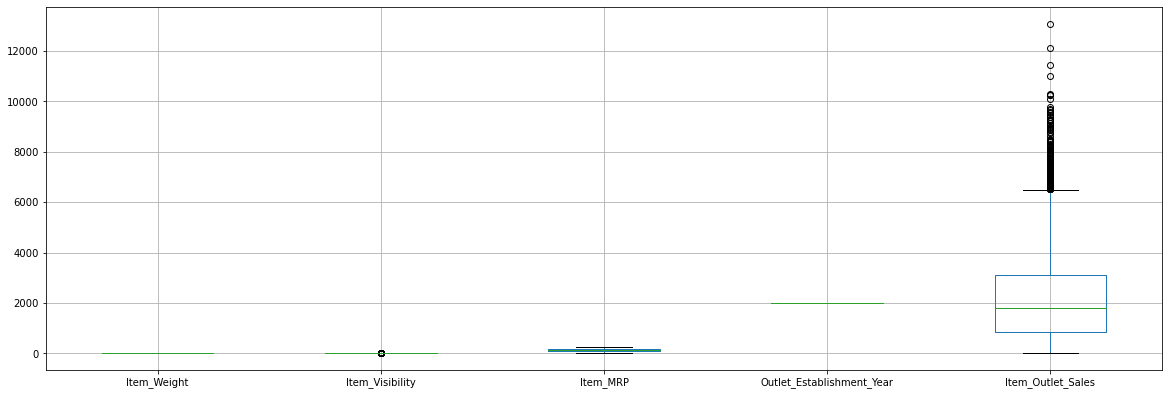

In [19]:
df.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# EDA

### Univariate Analysis:

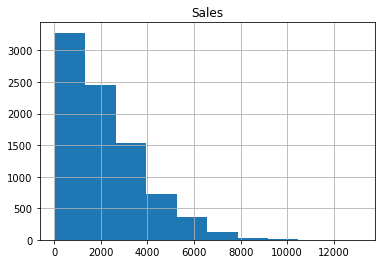

In [20]:
df["Item_Outlet_Sales"].hist(grid=True)
plt.title("Sales")
plt.show()

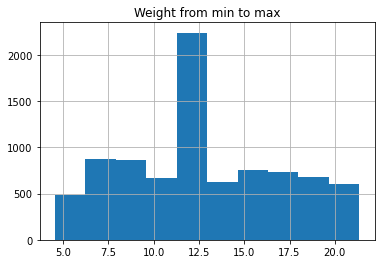

In [21]:
df["Item_Weight"].hist(grid=True)
plt.title("Weight from min to max")
plt.show()

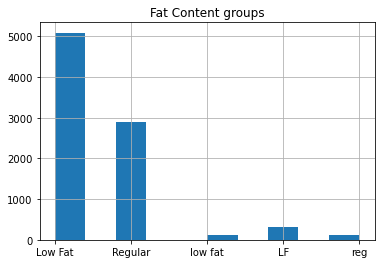

In [22]:
df["Item_Fat_Content"].hist(grid=True)
plt.title("Fat Content groups")
plt.show()

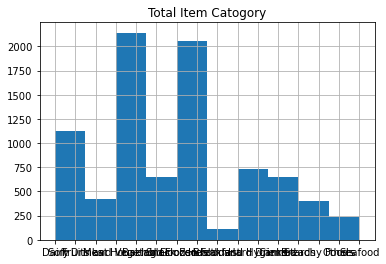

In [23]:
df["Item_Type"].hist(grid=True)
plt.title("Total Item Catogory")
plt.show()

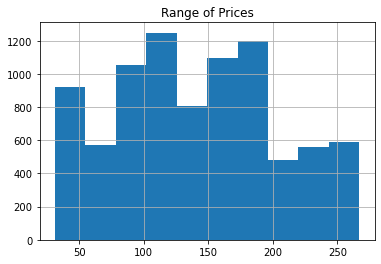

In [24]:
df["Item_MRP"].hist(grid=True)
plt.title("Range of Prices")
plt.show()

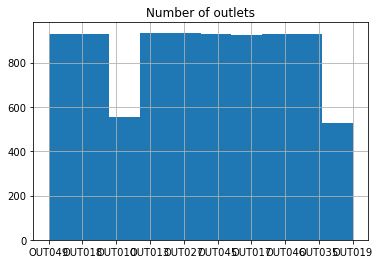

In [25]:
df["Outlet_Identifier"].hist(grid=True)
plt.title("Number of outlets")
plt.show()

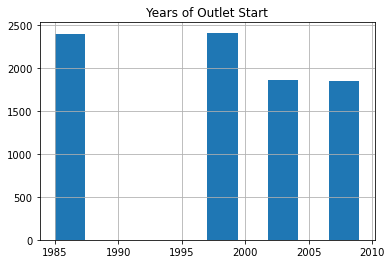

In [26]:
df["Outlet_Establishment_Year"].hist(grid=True)
plt.title("Years of Outlet Start")
plt.show()

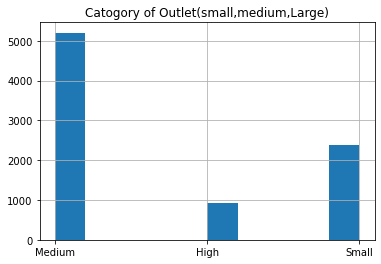

In [27]:
df["Outlet_Size"].hist(grid=True)
plt.title("Catogory of Outlet(small,medium,Large)")
plt.show()

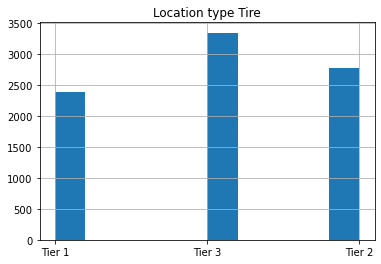

In [28]:
df["Outlet_Location_Type"].hist(grid=True)
plt.title("Location type Tire")
plt.show()

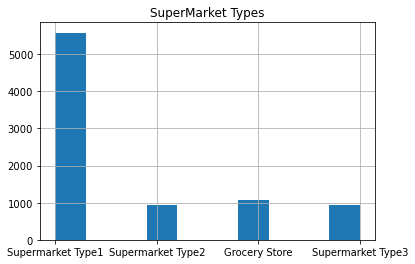

In [29]:
df["Outlet_Type"].hist(grid=True)
plt.title("SuperMarket Types")
plt.show()

## Bivariate Anaylsis:

<AxesSubplot:title={'center':'Comparision between Item Weight and Item Type'}, xlabel='Item_Weight', ylabel='Item_Type'>

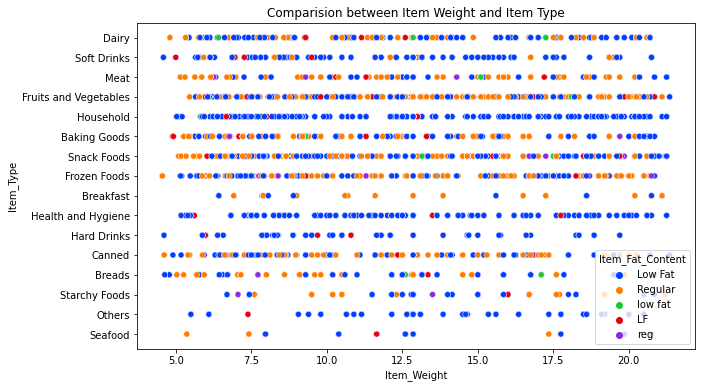

In [30]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Item Weight and Item Type')
sns.scatterplot(df['Item_Weight'],df['Item_Type'],hue=df['Item_Fat_Content'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Year of Start and Location'}, xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

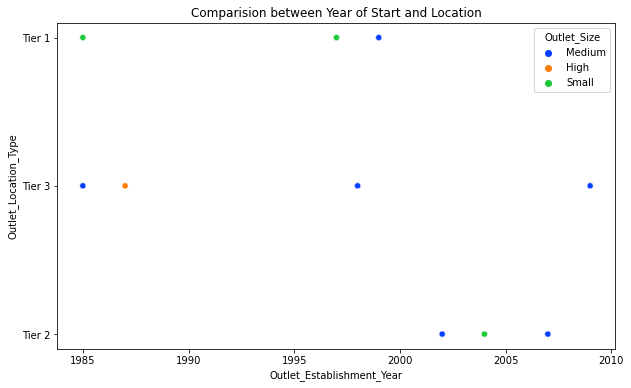

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Year of Start and Location')
sns.scatterplot(df['Outlet_Establishment_Year'],df['Outlet_Location_Type'],hue=df['Outlet_Size'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Outlet Type and Location'}, xlabel='Outlet_Type', ylabel='Outlet_Location_Type'>

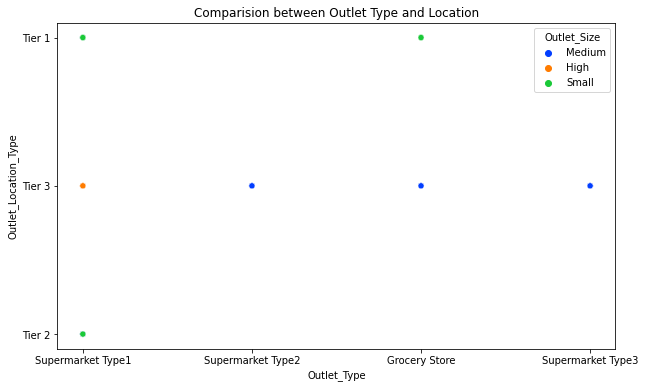

In [32]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Outlet Type and Location')
sns.scatterplot(df['Outlet_Type'],df['Outlet_Location_Type'],hue=df['Outlet_Size'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Outlet Type and Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

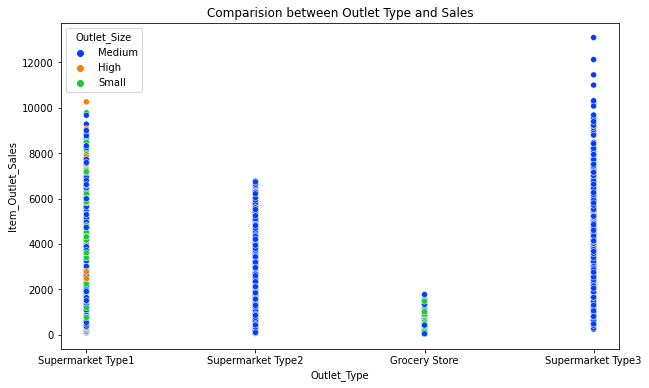

In [33]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Outlet Type and Sales')
sns.scatterplot(df['Outlet_Type'],df['Item_Outlet_Sales'],hue=df['Outlet_Size'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Year of start and Location'}, xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

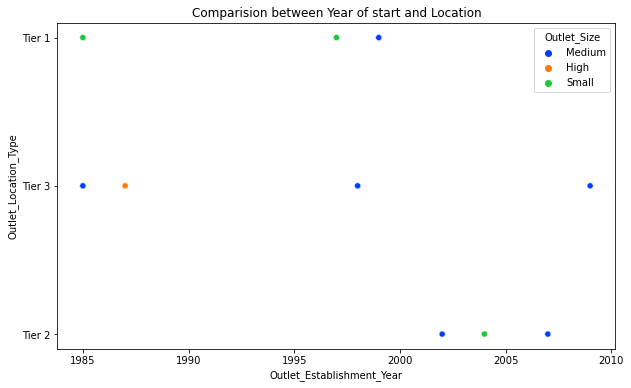

In [34]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Year of start and Location')
sns.scatterplot(df['Outlet_Establishment_Year'],df['Outlet_Location_Type'],hue=df['Outlet_Size'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Year of Establishment and Outlet Size'}, xlabel='Outlet_Establishment_Year', ylabel='Outlet_Size'>

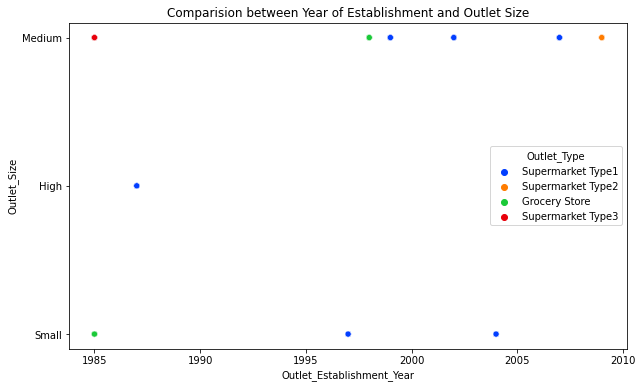

In [35]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Year of Establishment and Outlet Size')
sns.scatterplot(df['Outlet_Establishment_Year'],df['Outlet_Size'],hue=df['Outlet_Type'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Item Type and Item Visibility'}, xlabel='Item_Visibility', ylabel='Item_Type'>

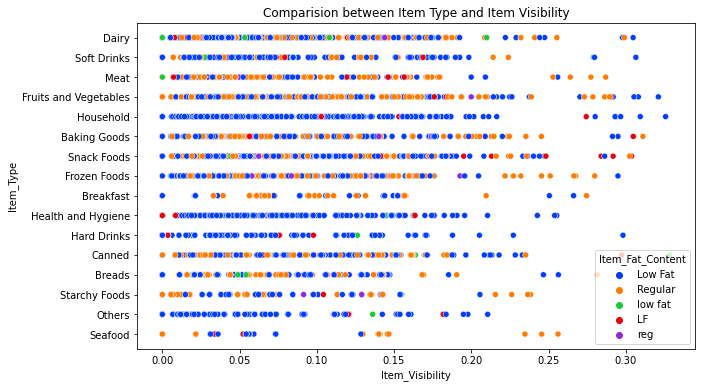

In [36]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Item Type and Item Visibility')
sns.scatterplot(df['Item_Visibility'],df['Item_Type'],hue=df['Item_Fat_Content'],palette='bright')

<AxesSubplot:title={'center':'Comparision between Item Weight and Item MRP'}, xlabel='Item_Weight', ylabel='Item_MRP'>

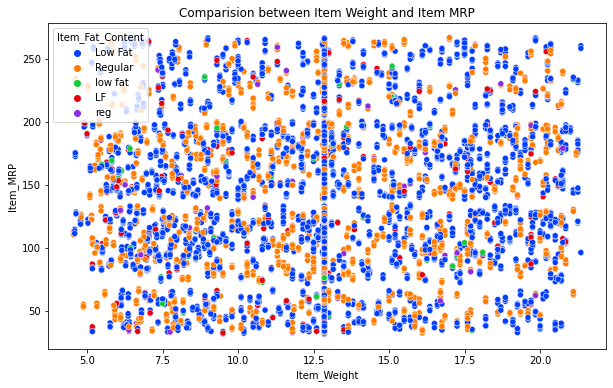

In [37]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Item Weight and Item MRP')
sns.scatterplot(df['Item_Weight'],df['Item_MRP'],hue=df['Item_Fat_Content'],palette='bright')

# Multivariate Analysis

In [38]:
corr_mat=df.corr()
corr_mat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


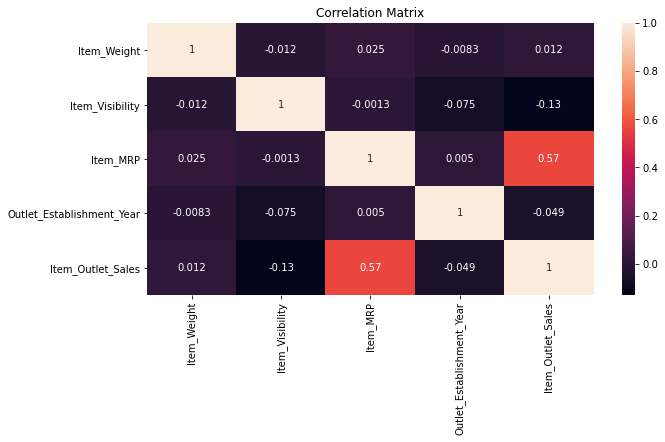

In [39]:
plt.figure(figsize=[10,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Need to Encode string columns to see distribution

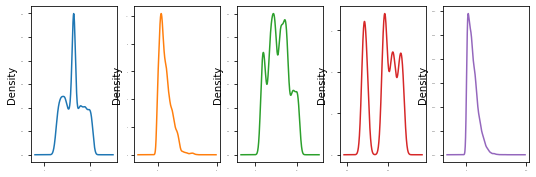

In [40]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

In [41]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Segragating Object columns alone for transformation

In [42]:
df_new=df

In [43]:
obj_df = df_new.select_dtypes(include=['object']).copy()
obj_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [44]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for column in obj_df:
    df_new.loc[:,column] = LE.fit_transform(df_new.loc[:,column]) 

In [45]:
df_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [46]:
df_new.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [47]:
corr_mat=df_new.corr()
corr_mat

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


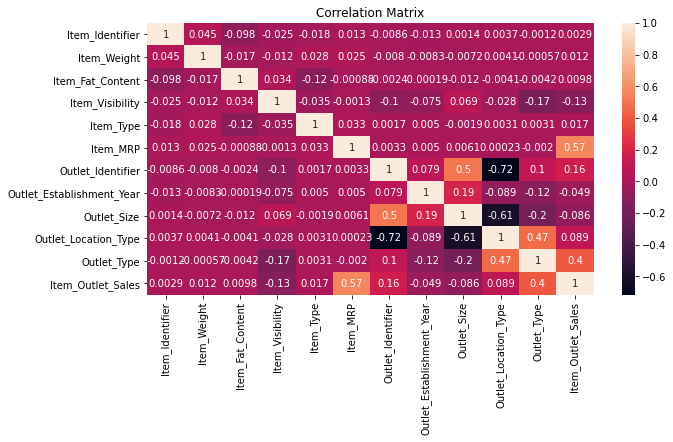

In [48]:
plt.figure(figsize=[10,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [49]:
collist=df_new.columns.values
collist

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'], dtype=object)

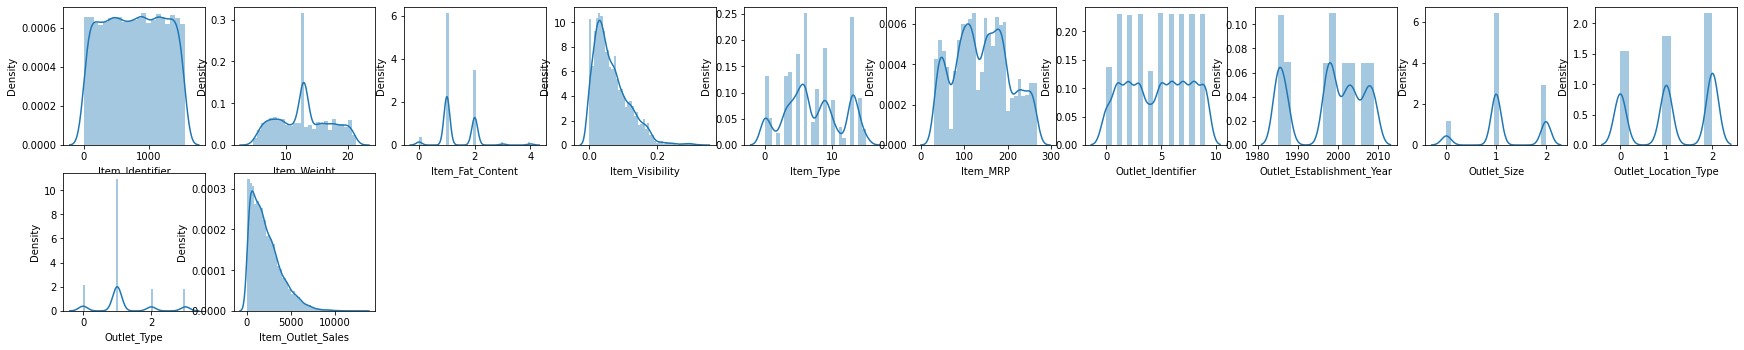

In [50]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

# Outliers and Skewness 

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
df_new2=df_new[(z<3).all(axis=1)]

In [52]:
df_new.shape

(8523, 12)

In [53]:
df_new2.shape

(8222, 12)

In [54]:
((8523-8222)/8523)*100

3.5316203214830457

In [55]:
df_new2.skew()

Item_Identifier             -0.011945
Item_Weight                  0.087821
Item_Fat_Content             0.291106
Item_Visibility              0.794506
Item_Type                    0.094578
Item_MRP                     0.139153
Outlet_Identifier           -0.067611
Outlet_Establishment_Year   -0.420927
Outlet_Size                 -0.089519
Outlet_Location_Type        -0.202794
Outlet_Type                  0.957163
Item_Outlet_Sales            0.877476
dtype: float64

In [56]:
x=df_new2.drop("Item_Outlet_Sales",axis=1)
y=df_new2["Item_Outlet_Sales"]

In [57]:
x.shape

(8222, 11)

In [58]:
y.shape

(8222,)

In [59]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [60]:
df_skew.skew()

Item_Identifier             -0.296537
Item_Weight                 -0.069934
Item_Fat_Content             0.017038
Item_Visibility              0.116318
Item_Type                   -0.166116
Item_MRP                    -0.112220
Outlet_Identifier           -0.215616
Outlet_Establishment_Year   -0.222552
Outlet_Size                 -0.044624
Outlet_Location_Type        -0.216697
Outlet_Type                  0.010506
dtype: float64

In [61]:
x=df_skew

In [62]:
x.shape

(8222, 11)

# Finding Best Random State:

In [63]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
 #  acc=accuracy_score(y_test,pred)
    acc=(r2_score(y_test,pred))
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.5532132486788297   at random_state: 6


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=6)

In [65]:
x_test.shape

(1645, 11)

In [66]:
y_test.shape

(1645,)

In [67]:
x_train.shape

(6577, 11)

In [68]:
y_train.shape

(6577,)

In [69]:
df_skew.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03
mean,-7.521214e-17,-4.514754e-17,-1.731365e-16,-4.200065e-16,3.363887e-16,3.147567e-16,-1.120215e-16,-1.243633e-17,-9.130781e-17,5.226771e-16,2.462354e-16
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-2.163723e+00,-2.126034e+00,-2.621717e+00,-1.731270e+00,-1.923668e+00,-1.988614e+00,-1.817079e+00,-1.481122e+00,-1.916231e+00,-1.376209e+00,-1.971736e+00
25%,-7.813579e-01,-8.176649e-01,-5.531914e-01,-7.871763e-01,-7.162139e-01,-7.065766e-01,-9.414420e-01,-1.293670e+00,-2.889337e-01,-1.376209e+00,-1.350811e-01
50%,1.037610e-01,4.552811e-02,-5.531914e-01,-5.563736e-02,-2.187336e-01,1.013593e-01,1.465485e-01,3.170402e-02,-2.889337e-01,-1.266511e-01,-1.350811e-01
75%,8.615750e-01,7.765559e-01,1.161702e+00,7.889254e-01,6.840025e-01,7.458202e-01,8.008871e-01,7.010803e-01,1.390615e+00,1.095295e+00,-1.350811e-01
max,1.545800e+00,1.879513e+00,2.680964e+00,2.195827e+00,1.705888e+00,1.863653e+00,1.419282e+00,1.451492e+00,1.390615e+00,1.095295e+00,1.955483e+00


# Standardisation:

In [70]:
df_skew.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03,8.222000e+03
mean,-7.521214e-17,-4.514754e-17,-1.731365e-16,-4.200065e-16,3.363887e-16,3.147567e-16,-1.120215e-16,-1.243633e-17,-9.130781e-17,5.226771e-16,2.462354e-16
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-2.163723e+00,-2.126034e+00,-2.621717e+00,-1.731270e+00,-1.923668e+00,-1.988614e+00,-1.817079e+00,-1.481122e+00,-1.916231e+00,-1.376209e+00,-1.971736e+00
25%,-7.813579e-01,-8.176649e-01,-5.531914e-01,-7.871763e-01,-7.162139e-01,-7.065766e-01,-9.414420e-01,-1.293670e+00,-2.889337e-01,-1.376209e+00,-1.350811e-01
50%,1.037610e-01,4.552811e-02,-5.531914e-01,-5.563736e-02,-2.187336e-01,1.013593e-01,1.465485e-01,3.170402e-02,-2.889337e-01,-1.266511e-01,-1.350811e-01
75%,8.615750e-01,7.765559e-01,1.161702e+00,7.889254e-01,6.840025e-01,7.458202e-01,8.008871e-01,7.010803e-01,1.390615e+00,1.095295e+00,-1.350811e-01
max,1.545800e+00,1.879513e+00,2.680964e+00,2.195827e+00,1.705888e+00,1.863653e+00,1.419282e+00,1.451492e+00,1.390615e+00,1.095295e+00,1.955483e+00


In [71]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)
x_t = scalar.transform(x)
print(x_t)
#print(x_test)

[[-1.45506827 -0.8129114  -0.54465358 ... -0.28532397 -1.3753797
  -0.13908262]
 [-2.08503954 -1.71377834  1.1684233  ... -0.28532397  1.09602759
   1.05688882]
 [-0.15761547  1.0720458  -0.54465358 ... -0.28532397 -1.3753797
  -0.13908262]
 ...
 [ 1.19043816 -0.49072575 -0.54465358 ...  1.38693911 -0.1258707
  -0.13908262]
 [-0.11649892 -1.35738088  1.1684233  ... -0.28532397  1.09602759
   1.05688882]
 [-1.85437594  0.48525545 -0.54465358 ...  1.38693911 -1.3753797
  -0.13908262]]


# Model Building:

In [72]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print('\n ')
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [-7.31725620e-02 -4.66143273e+00  1.93994967e+01 -3.68757344e+01
 -4.10577548e+00  9.12122897e+02  4.15876699e+01 -4.55484107e+01
 -1.44356353e+02 -2.40615407e+02  6.98770530e+02]
Intercept   :  2140.1658631594955

 
Score       :  0.5069738582919763
 
error
Mean absolute error    : 819.6937731462494
Mean squared error     : 1132476.6871242465
Root mean squared error: 1064.1788792887437
 
r2 score :  0.5532132486788297


In [73]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)
print("Coefficient : ",ls.coef_)
print("Intercept   : ",ls.intercept_)
print("Score       : ",ls.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [-7.30756750e-02 -4.66133482e+00  1.93994192e+01 -3.68756493e+01
 -4.10568028e+00  9.12122785e+02  4.15878620e+01 -4.55483222e+01
 -1.44356130e+02 -2.40614913e+02  6.98770247e+02]
Intercept   :  2140.1658631594955
Score       :  0.5069738582919172
 
error
Mean absolute error    : 819.6937731462494
Mean squared error     : 1132476.6871242465
Root mean squared error: 1064.1788792887437
 
r2 score :  0.5532132486788297


In [74]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [-7.31721339e-02 -4.66143214e+00  1.93994965e+01 -3.68757356e+01
 -4.10577509e+00  9.12122883e+02  4.15877093e+01 -4.55484087e+01
 -1.44356350e+02 -2.40615358e+02  6.98770493e+02]
Intercept   :  2140.1658631594955
Score       :  0.5069738582919759
 
error
Mean absolute error    : 819.6937731462494
Mean squared error     : 1132476.6871242465
Root mean squared error: 1064.1788792887437
 
r2 score :  0.5532132486788297


In [75]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9339802373258972
 
error
Mean absolute error    : 819.6937731462494
Mean squared error     : 1132476.6871242465
Root mean squared error: 1064.1788792887437
 
r2 score :  0.5532132486788297


# CrossValidation Checking

In [76]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.5145481125542827


In [77]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(ls,x,y,cv=5)
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.5145481165061719


In [78]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rd,x,y,cv=5)
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.5145481126426795


In [79]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.5386306830744187


# Parameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

#For Classifications: parameters={'max_depth': np.arange(2,10),'criterion': ['gini','entropy']}

#Linear Regression: parameters={"fit_intercept":(True,False), "normalize":(False,True), "copy_X":(True,False),"positive":(False,True)}

#RandomForestRegressor: 
#parameters={"max_depth":range(2,8),"bootstrap":[True,False], "criterion":["mse", "mae"],}

# nneighbors : parameters = dict(n_neighbors = [1,3,5,7,9])

# svm = SVC(kernel=”rbf”) : parameters = {“C”: [1, 10, 100],”gamma”: [.01, .1]}

# AdaBoost regression:
#boost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=90)
#parameters = {'n_estimators': (1, 2),'base_estimator__max_depth': (1, 2)}

# create and fit a ridge regression model, testing each alpha
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
parameters=dict(alpha=alphas)



In [81]:
gcv=GridSearchCV(Lasso(), parameters,cv=5) #Tuning

In [82]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [83]:
gcv.best_params_
#print(gcv.best_score_)
#print(gcv.best_estimator_.alpha)

{'alpha': 1.0}

# Testing with the 2nd Dataset

In [84]:
df_testdata=pd.read_csv("bigdatamart_Test.csv")
df_testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [85]:
df_testdata=x_test

In [86]:
x_test.shape

(1645, 11)

In [87]:
mod=Lasso(alpha=1,random_state=6)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

55.32373989128223


# Saving the model

In [88]:
import joblib
joblib.dump(mod,"Bigdata Mart.pkl")

['Bigdata Mart.pkl']

# Loading the saved model

In [89]:
model=joblib.load("Bigdata Mart.pkl")

In [90]:
prediction=model.predict(x_test)

In [91]:
print(r2_score(y_test,prediction)*100)

55.32373989128223


In [92]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [93]:
prediction.to_csv('Bigdata.csv') #Saving the predictions

In [94]:
prediction

,0
0,-1172.993984
1,1315.209146
2,1884.764295
3,3579.581650
4,1843.238278
5,3984.122754
6,3974.857454
7,1578.405042
8,2446.828562
9,2483.600909
